<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2023/24 Semester</h3></th>
    </tr>
</table>

#### Name: Akul Arun
#### Student ID: S10243523

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = os.path.join(os.getcwd(), 'test')
img_size = 224
best_model = keras.models.load_model('food_model_best.keras')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

evaluation_results = best_model.evaluate(test_generator, steps=len(test_generator))

print("Test Loss:", evaluation_results[0])
print("Test Accuracy:", evaluation_results[1])

Found 500 images belonging to 10 classes.
16/16 [==============================] - 5s 95ms/step - loss: 0.6899 - acc: 0.8220
Test Loss: 0.6899250745773315
Test Accuracy: 0.8220000267028809


In [4]:
from PIL import Image
x_test = []
y_test = []

class_labels = {'chicken_quesadilla': 0, 'creme_brulee': 1, 'croque_madame': 2, 'fish_and_chips': 3, 'foie_gras': 4,
                'fried_rice': 5, 'paella': 6, 'poutine': 7, 'tacos': 8, 'waffles': 9}

for class_folder in sorted(os.listdir(test_dir)):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        class_label = class_labels[class_folder]

        for image_file in sorted(os.listdir(class_folder_path)):
            image_path = os.path.join(class_folder_path, image_file)
            img = Image.open(image_path)
            img = img.resize((224, 224))
            img_array = np.array(img)
            x_test.append(img_array)
            y_test.append(class_label)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.astype('float32') / 255.0

In [5]:
predictions = best_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis= 1)
true_labels = test_generator.classes

16/16 [==============================] - 2s 44ms/step


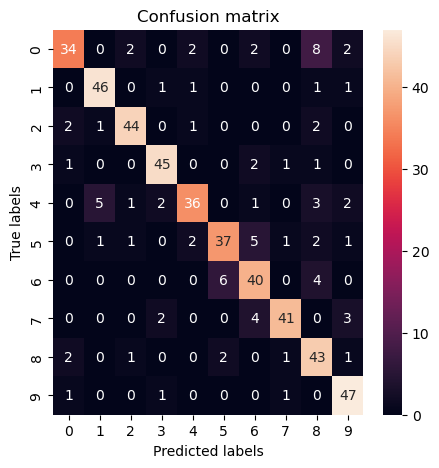

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix_7 = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix_7, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

## Use the best model to make prediction

### Low Noise Waffle Image Test

In [7]:
# Load the model
img_size = 224
model = keras.models.load_model('food_model_best.keras')

In [8]:
# Load the food list (in alphabetical order)
with open('1.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['chicken_quesadilla', 'creme_brulee', 'croque_madame', 'fish_and_chips', 'foie_gras', 'fried_rice', 'paella', 'poutine', 'tacos', 'waffles']


In [9]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

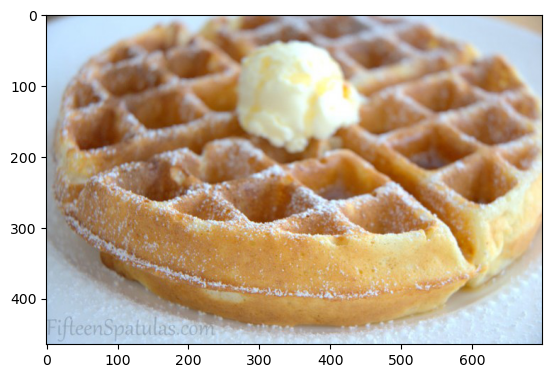

1/1 [==============================] - 1s 709ms/step
The prediction is:  waffles 

    chicken_quesadilla  creme_brulee  croque_madame  fish_and_chips  \
0        2.813428e-17  3.268474e-21   6.317227e-31    4.191295e-23   

      foie_gras    fried_rice        paella       poutine  tacos  waffles  
0  1.322580e-20  3.420421e-29  2.798121e-33  5.243304e-30    0.0      1.0  


In [10]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'waffle_test1.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

### Waffle Image with More Noise Test

In [2]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# Load the model
img_size = 224
model = keras.models.load_model('food_model_best.keras')

In [3]:
# Load the food list (in alphabetical order)
with open('1.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['chicken_quesadilla', 'creme_brulee', 'croque_madame', 'fish_and_chips', 'foie_gras', 'fried_rice', 'paella', 'poutine', 'tacos', 'waffles']


In [4]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

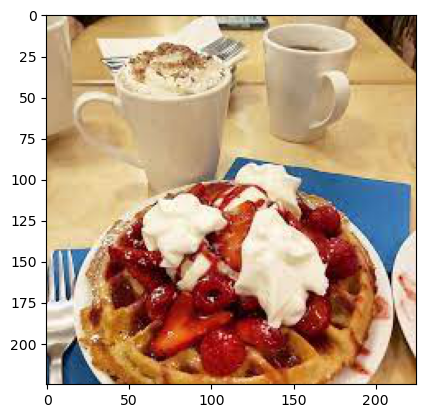

1/1 [==============================] - 4s 4s/step
The prediction is:  waffles 

    chicken_quesadilla  creme_brulee  croque_madame  fish_and_chips  foie_gras  \
0            0.000712      0.000006       0.000003        0.000006   0.000021   

   fried_rice        paella   poutine         tacos   waffles  
0    0.000001  5.652761e-08  0.000086  7.086069e-08  0.999166  


In [5]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'waffle_test2.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

### Chicken Quesadilla Image Test

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# Load the model
img_size = 224
model = keras.models.load_model('food_model_best.keras')

In [2]:
# Load the food list (in alphabetical order)
with open('1.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['chicken_quesadilla', 'creme_brulee', 'croque_madame', 'fish_and_chips', 'foie_gras', 'fried_rice', 'paella', 'poutine', 'tacos', 'waffles']


In [3]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

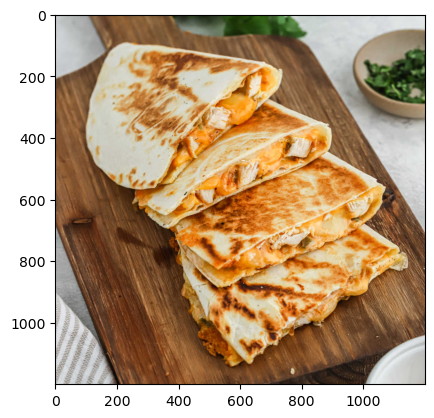

1/1 [==============================] - 4s 4s/step
The prediction is:  chicken_quesadilla 

    chicken_quesadilla  creme_brulee  croque_madame  fish_and_chips  \
0                 1.0  1.496830e-14   2.254074e-10    2.410161e-08   

      foie_gras    fried_rice        paella       poutine         tacos  \
0  4.834756e-11  7.880716e-15  1.592145e-19  1.219519e-14  2.929649e-15   

        waffles  
0  3.985303e-09  


In [4]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'Chicken-Quesadilla-1.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

### Finding How model Handles Incorrect Images

In [1]:
# Import the Required Packages
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# Load the model
img_size = 224
model = keras.models.load_model('food_model_best.keras')

In [2]:
# Load the food list (in alphabetical order)
with open('1.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['chicken_quesadilla', 'creme_brulee', 'croque_madame', 'fish_and_chips', 'foie_gras', 'fried_rice', 'paella', 'poutine', 'tacos', 'waffles']


In [3]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

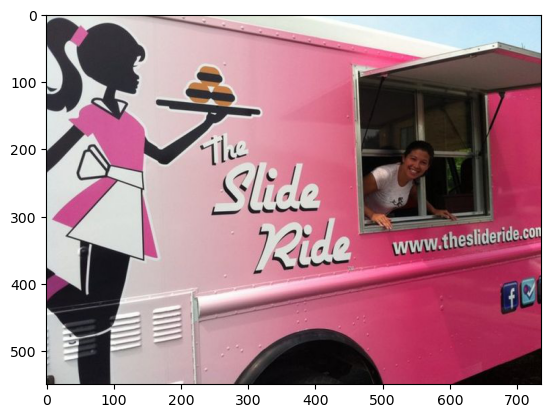

1/1 [==============================] - 3s 3s/step
The prediction is:  waffles 

    chicken_quesadilla  creme_brulee  croque_madame  fish_and_chips  foie_gras  \
0            0.004862      0.074939       0.001782        0.000376   0.153397   

   fried_rice    paella   poutine     tacos   waffles  
0    0.002346  0.014454  0.003399  0.010297  0.734149  


In [4]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = 'food truck1.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)